In [140]:
%matplotlib ipympl
import matplotlib.pyplot as plt

We solve a normal wave equation to study the program's behavior

In [ ]:
from pde import CartesianGrid, ScalarField, FieldCollection, PDE, MemoryStorage, plot_kymographs
import numpy as np

# Constants
z_min, z_max = 0, 10
grid_points = 501

# Define grid
grid = CartesianGrid([[z_min, z_max]], [grid_points])  # z-grid
z = grid.axes_coords[0]

# Define initial conditions
#np.sin((z - 4.5) * 10)
u_init = ScalarField(grid, data=np.where((z >= 4.5) & (z <= 5.5), np.sin((z-4.5)*10), 0), label="u(t, z)")
ut_init = ScalarField(grid, data=np.where((z >= 4.5) & (z <= 5.5), 0.1, 0), label="ut(t, z)")

# Combine into FieldCollection
initial_conditions = FieldCollection([u_init, ut_init])

# Define the wave equation system
pde = PDE({
    "u": "v",  # u_t = ut
    "v": f"laplace(u)"  # ut_t = u_zz
})

# Solve the system
# storage.clear()
storage = MemoryStorage()
pde.solve(initial_conditions, t_range=10, dt=0.00001, tracker=storage.tracker(interval=0.01))

# Plot the kymograph
# plot_kymographs(storage)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

z = grid.axes_coords[0] 
time_points = storage.times
u_data = np.array([state.data[0] for state in storage])

# Create a meshgrid for time and space
T, Z = np.meshgrid(time_points, z, indexing="ij")

# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, u_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("Wave equations")

# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4)  # Example: Manually set vmin/vmax
plt.show()


In [ ]:
plt.figure()
index = 0
plt.plot(z, u_data[index])
plt.title(f"time slice: {time_points[index]}")
plt.show()

we now do the same thing, with initial values covering the whole thing

In [ ]:

from pde import CartesianGrid, ScalarField, FieldCollection, PDE, MemoryStorage, plot_kymographs
import numpy as np

# Constants
z_min, z_max = 0, 10
grid_points = 501

# Define grid
grid = CartesianGrid([[z_min, z_max]], [grid_points])  # z-grid
z = grid.axes_coords[0]

# Define initial conditions
#np.sin(z)
u_init = ScalarField(grid, data=np.full_like(z, np.sin(z)), label="u(t, z)")
ut_init = ScalarField(grid, data=np.full_like(z, 0.1), label="ut(t, z)")

# Combine into FieldCollection
initial_conditions = FieldCollection([u_init, ut_init])

# Define the wave equation system
pde = PDE({
    "u": "v",  # u_t = ut
    "v": f"laplace(u)"  # ut_t = u_zz
})

# Solve the system
storage.clear()
storage = MemoryStorage()
pde.solve(initial_conditions, t_range=10, dt=0.00001, tracker=storage.tracker(interval=0.01))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

z = grid.axes_coords[0] 
time_points = storage.times
u_data = np.array([state.data[0] for state in storage])

T, Z = np.meshgrid(time_points, z, indexing="ij")

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, u_data, shading="auto")
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("Wave equations")

#mesh.set_clim(-0.1, 0.4)  # Example: Manually set vmin/vmax
plt.show()


We look at the real solutions from the paper, using the approximated solutions (3.12 and 3.13)

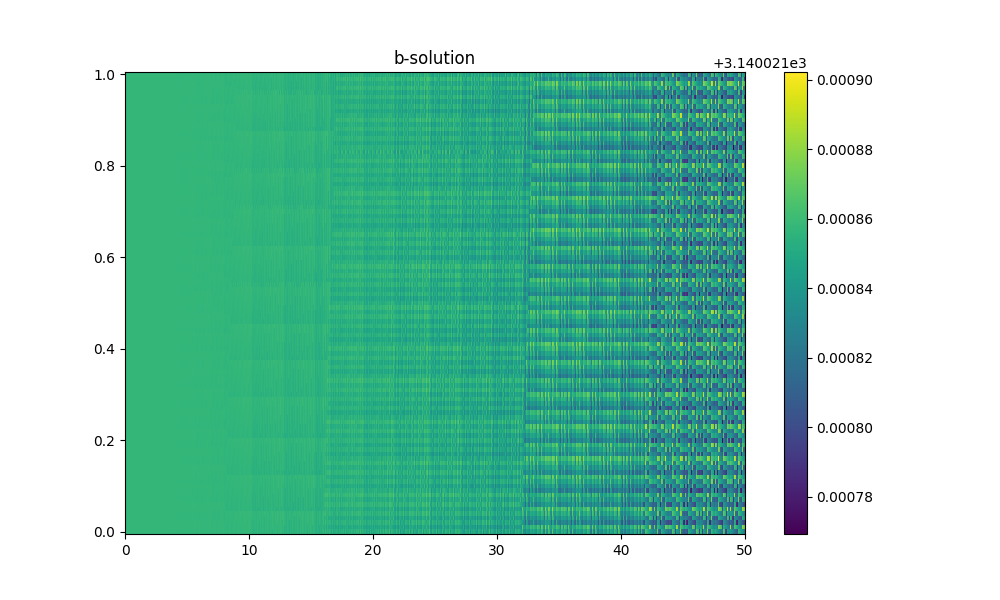

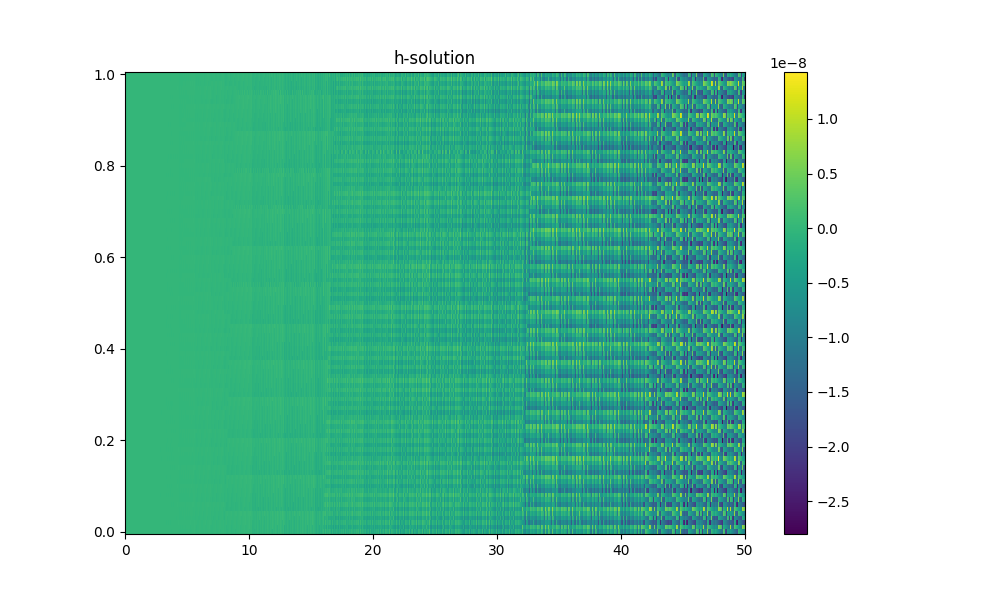

In [273]:
#colorplot of solution with really high rapid frequency
import numpy as np
import matplotlib.pyplot as plt

#setting up our grid
z_range = np.linspace(0, 50, 5001)
t_range = np.linspace(0, 1, 101) 
z, t = np.meshgrid(z_range, t_range)  # Create a grid of z and t values

#setting some constants
D = 50 #length of the area with the magnetic field. We set it to match our z-value for now. 
omega_r = 1000
omega_s = 0.01
A = 1

# We find the real part of the solution from the paper (in region 2)
#b-field
b_term1 = (1/2) * A * omega_r * 2*np.pi * np.exp(1j * omega_r * 2*np.pi * (z - t))
b_term2 = -(1/4) * np.exp(2j * D * omega_r * 2*np.pi) * A * omega_s * 2*np.pi * np.exp(-1j * omega_r * 2*np.pi * (z + t))
b_term3 = -(1/2) * 1j * A * omega_r * 2*np.pi * omega_s * 2*np.pi * z * np.exp(1j * omega_r * 2*np.pi * (z - t))
b = b_term1 + b_term2 + b_term3
b_real = np.real(b)  # Extract real part

#h-field
h_term1 = (A * omega_s / (2 * omega_r)) * np.exp(1j * omega_r * 2*np.pi * (z - t))
h_term2 = -(A * omega_s / (2 * omega_r)) * np.exp(2j * D * omega_r * 2*np.pi)* np.exp(-1j * omega_r * 2*np.pi * (z + t))
h_term3 = -(1j * omega_s * 2*np.pi * z * A) * np.exp(1j * omega_r * 2*np.pi * (z - t))
h = h_term1 + h_term2 + h_term3
h_real = np.real(h)  # Extract real part


import matplotlib.pyplot as plt
import numpy as np


# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(z, t, b_real, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)
ax.set_title("b-solution")
# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4) 
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(z, t, h_real, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)
ax.set_title("h-solution")
# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4)
plt.show()



Below, we handle the functions symbolically, so we can take the time derivative to use in the initial conditions

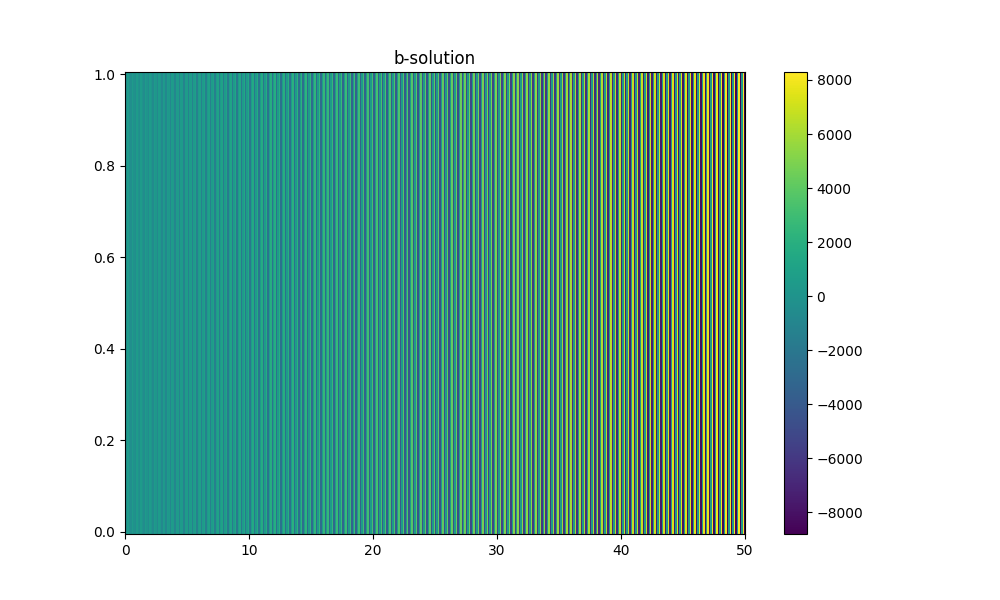

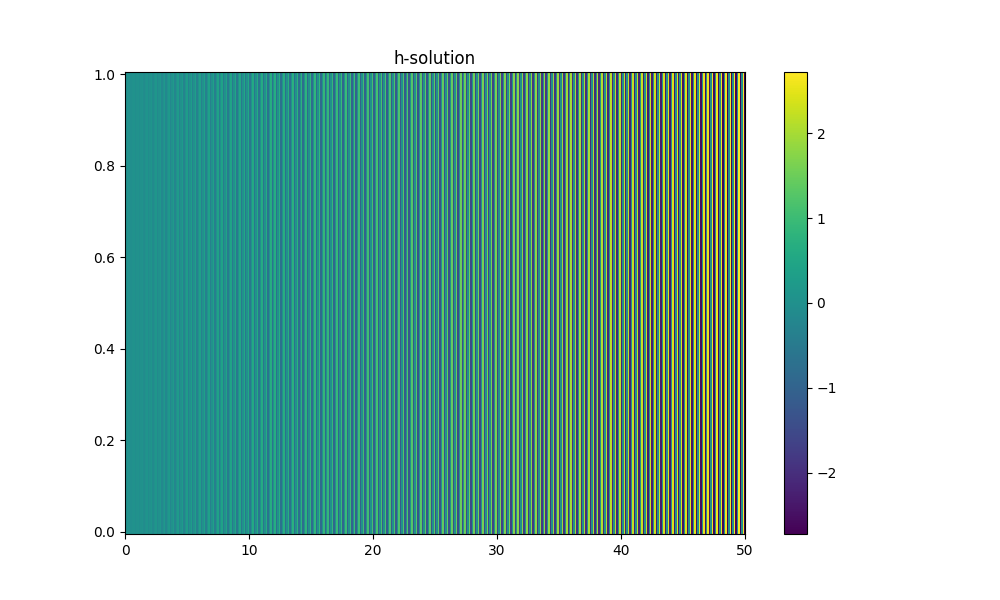

In [276]:
import sympy as sp

# Define symbols
z, t = sp.symbols('z t', real=True)
D, omega_r, omega_s, A = sp.symbols('D omega_r omega_s A', real=True)

# b-field symbolic equation
b_term1 = (1/2) * A * omega_r * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
b_term2 = -(1/4) * sp.exp(2 * sp.I * D * omega_r *2*sp.pi) * A * omega_s *2*sp.pi * sp.exp(-sp.I * omega_r *2*sp.pi * (z + t))
b_term3 = -(1/2) * sp.I * A * omega_r *2*sp.pi * omega_s *2*sp.pi * z * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
b = b_term1 + b_term2 + b_term3
b_real = sp.simplify(sp.expand_complex(sp.re(b)))  # Extract real part
#b_dt = sp.diff(b, t)  # Time derivative
#b_real_dt = sp.re(b_dt)

# h-field symbolic equation
h_term1 = (A * omega_s / (2 * omega_r)) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
h_term2 = -(A * omega_s / (2 * omega_r)) * sp.exp(2 * sp.I * D * omega_r *2*sp.pi) * sp.exp(-sp.I * omega_r *2*sp.pi * (z + t))
h_term3 = -(sp.I * omega_s *2*sp.pi * z * A) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
h = h_term1 + h_term2 + h_term3
h_real = sp.simplify(sp.expand_complex(sp.re(h)))  # Extract real part
#h_dt = sp.diff(h, t)  # Time derivative
#h_real_dt = sp.re(h_dt)

b_real_func = sp.lambdify((z, t, D, omega_r, omega_s, A), b_real, 'numpy')
h_real_func = sp.lambdify((z, t, D, omega_r, omega_s, A), h_real, 'numpy')

D_val = 100
omega_r_val = 1000
omega_s_val = 0.01
A_val = 1

#setting up our grid
z_range = np.linspace(0, 50, 6001)
t_range = np.linspace(0, 1, 101) 
z_vals, t_vals = np.meshgrid(z_range, t_range)  # Create a grid of z and t values


# Evaluate the symbolic functions numerically
b_grid = b_real_func(z_vals, t_vals, D_val, omega_r_val, omega_s_val, A_val)
h_grid = h_real_func(z_vals, t_vals, D_val, omega_r_val, omega_s_val, A_val)
import matplotlib.pyplot as plt
import numpy as np


# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(z_vals, t_vals, b_grid, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)
ax.set_title("b-solution")
# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4) 
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(z_vals, t_vals, h_grid, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)
ax.set_title("h-solution")
# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4)
plt.show()

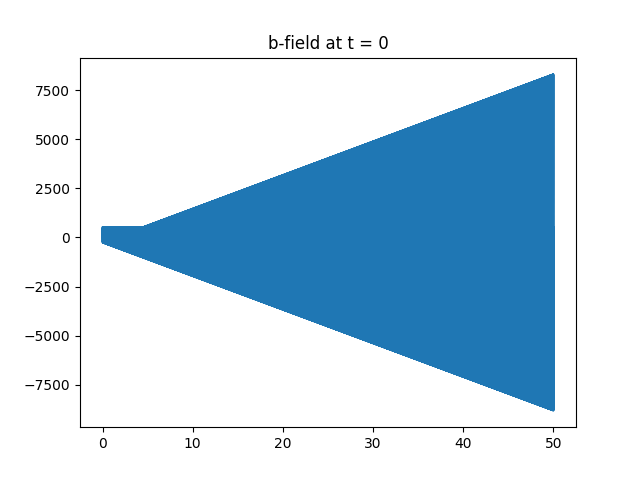

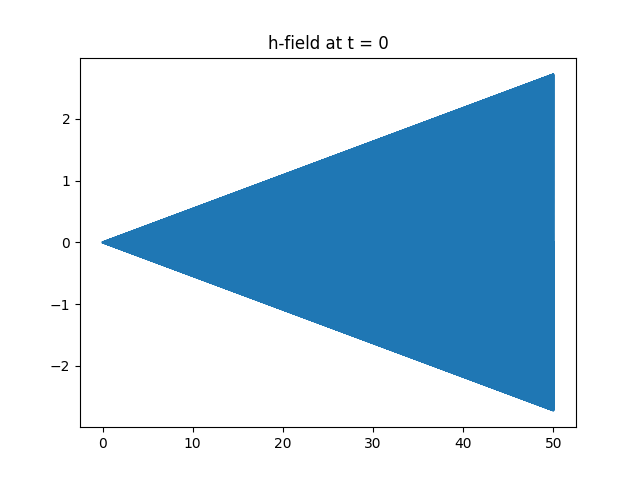

In [277]:
plt.figure()
index = 0
plt.plot(z_range, b_grid[index])
plt.title(f"b-field at t = {time_points[index]}")
plt.show()
plt.figure()
plt.plot(z_range, h_grid[index])
plt.title(f"h-field at t = {time_points[index]}")
plt.show()

We now solve the equations. This is using IC's from region 2, for both h and b.

In [224]:
#finding initial conditions from the paper

import numpy as np
import sympy as sp
from pde import ScalarField, FieldCollection, PDE, MemoryStorage, CartesianGrid

# Define symbols
z, t = sp.symbols('z t', real=True)
D, omega_r, omega_s, A = sp.symbols('D omega_r omega_s A', real=True)

# b-field symbolic equation
b_term1 = (1/2) * A * omega_r *2*sp.pi * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
b_term2 = -(1/4) * sp.exp(2 * sp.I * D * omega_r *2*sp.pi) * A * omega_s *2*sp.pi * sp.exp(-sp.I * omega_r *2*sp.pi * (z + t))
b_term3 = -(1/2) * sp.I * A * omega_r *2*sp.pi * omega_s *2*sp.pi * z * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
b = b_term1 + b_term2 + b_term3
b_real = sp.re(b)  # Extract real part
b_dt = sp.diff(b, t)  # Time derivative
b_real_dt = sp.re(b_dt)

# h-field symbolic equation
h_term1 = (A * omega_s / (2 * omega_r)) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
h_term2 = -(A * omega_s / (2 * omega_r)) * sp.exp(2 * sp.I * D * omega_r *2*sp.pi) * sp.exp(-sp.I * omega_r *2*sp.pi * (z + t))
h_term3 = -(sp.I * omega_s *2*sp.pi * z * A) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
h = h_term1 + h_term2 + h_term3
h_real = sp.re(h)  # Extract real part
h_dt = sp.diff(h, t)  # Time derivative
h_real_dt = sp.re(h_dt)

# Convert symbolic expressions to numerical functions
b_real_func = sp.lambdify((z, t, D, omega_r, omega_s, A), b_real, 'numpy')
b_real_dt_func = sp.lambdify((z, t, D, omega_r, omega_s, A), b_real_dt, 'numpy')
h_real_func = sp.lambdify((z, t, D, omega_r, omega_s, A), h_real, 'numpy')
h_real_dt_func = sp.lambdify((z, t, D, omega_r, omega_s, A), h_real_dt, 'numpy')

# Setup for numerical evaluation
Bx = 2*omega_s_val
grid = CartesianGrid([[0, 50]], [6001])  # 1D grid for the z-axis
z_vals = grid.axes_coords[0]
t_val = 0  # Time for initial condition
D_val = 10
omega_r_val = 100000
omega_s_val = 0.1
A_val = 1

# Evaluate the symbolic functions numerically
b_init_data = b_real_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)
b_init_dt_data = b_real_dt_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)
h_init_data = h_real_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)
h_init_dt_data = h_real_dt_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)

# Create ScalarField objects
b_init = ScalarField(grid, data=b_init_data, label="b(0, z)")
h_init = ScalarField(grid, data=h_init_data, label="h(0, z)")
bt_init = ScalarField(grid, data=b_init_dt_data, label="bt(0, z)")
ht_init = ScalarField(grid, data=h_init_dt_data, label="ht(0, z)")

initial_conditions = FieldCollection([b_init, h_init, bt_init, ht_init])

#our equations
pde = PDE({
    "b": "bt",  # b_t = bt
    "h": "ht",  # h_t = ht
    "bt": f"laplace(b) + laplace(h) * {Bx}",  # bt_t = function of second derivative of b
    "ht": f"laplace(h) - 4 * {Bx} * b"       # ht_t = function of second derivative of h
})

#solve and store time slices
storage.clear()
storage = MemoryStorage()
#this dt needs to be really small
pde.solve(initial_conditions, t_range=1, dt=0.000001, tracker=storage.tracker(interval=0.01)) 


FieldCollection(ScalarField(..., label="b(0, z)"), ScalarField(..., label="h(0, z)"), ScalarField(..., label="bt(0, z)"), ScalarField(..., label="ht(0, z)"))

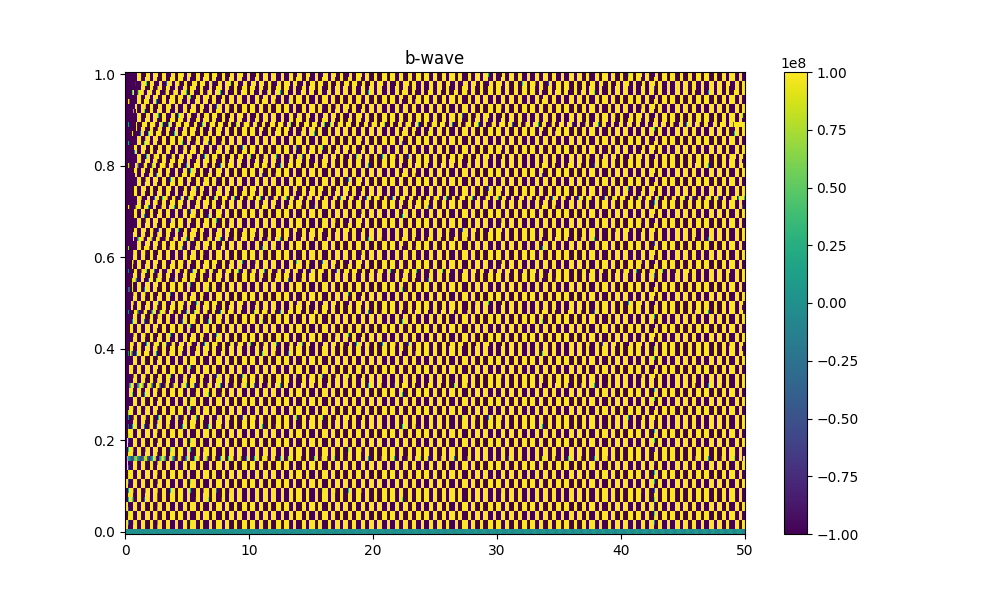

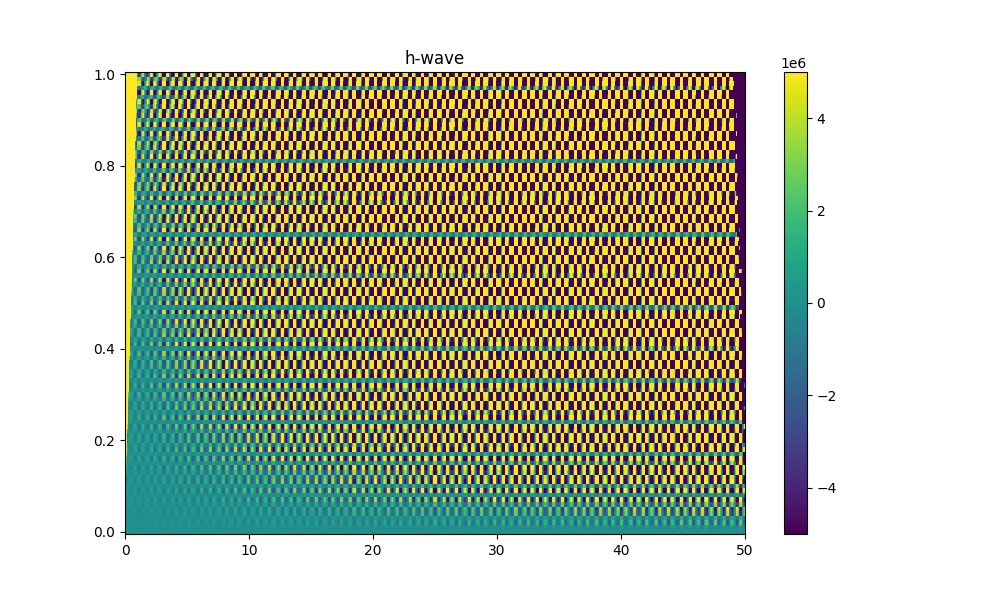

In [225]:
import matplotlib.pyplot as plt
import numpy as np

z = grid.axes_coords[0] 
time_points = storage.times
b_data = np.array([state.data[0] for state in storage])
h_data = np.array([state.data[1] for state in storage])

# Create a meshgrid for time and space
T, Z = np.meshgrid(time_points, z, indexing="ij")

# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, b_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("b-wave")

# Optionally adjust the color axis
mesh.set_clim(-100000000, 100000000)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, h_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("h-wave")

# Optionally adjust the color axis
mesh.set_clim(-5000000,5000000)
plt.show()

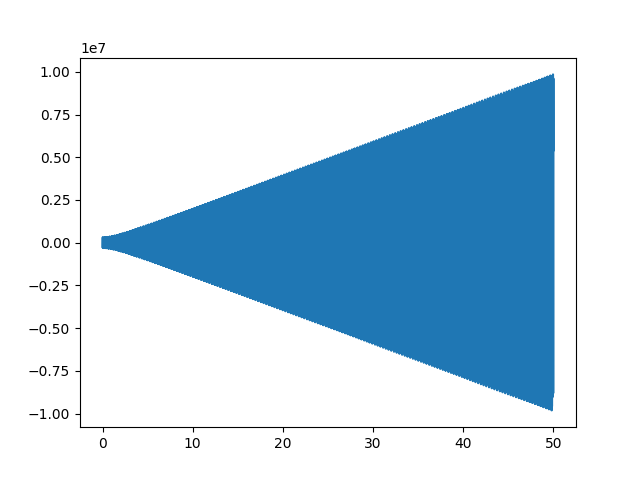

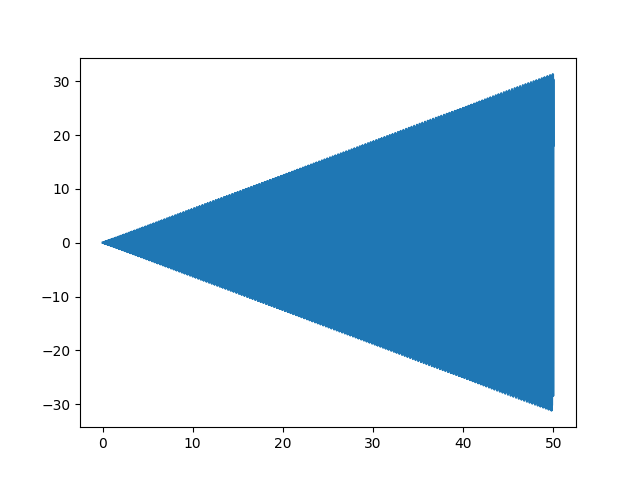

In [226]:
plt.figure()
plt.plot(z, b_init_data)

plt.figure()
plt.plot(z, h_init_data)

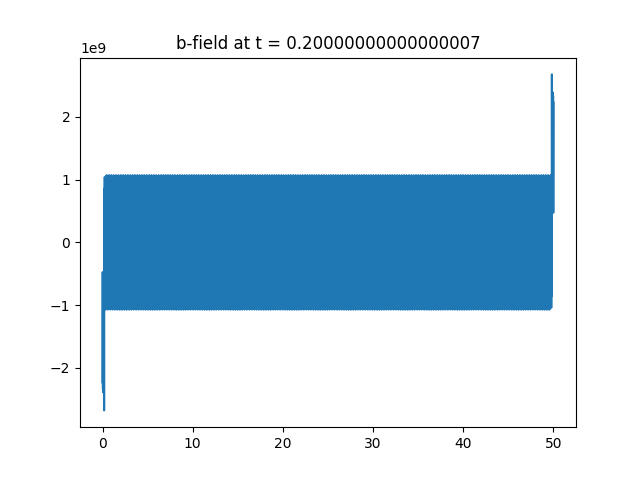

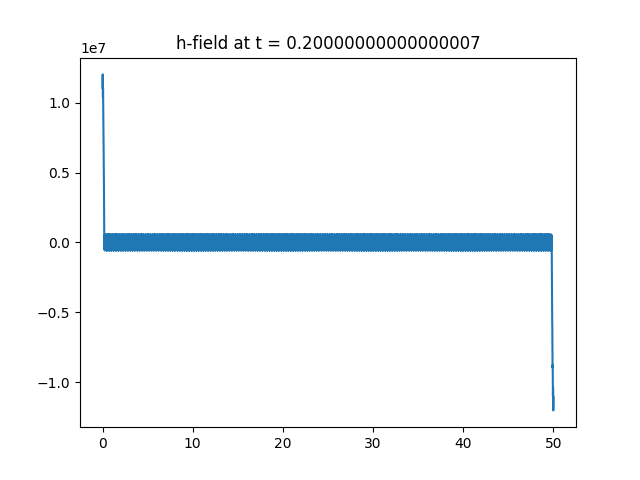

In [233]:
plt.figure()
index = 20
plt.plot(z, b_data[index])
plt.title(f"b-field at t = {time_points[index]}")
#plt.ylim([-100000000,100000000])
plt.show()
plt.figure()
plt.plot(z, h_data[index])
plt.title(f"h-field at t = {time_points[index]}")
#plt.ylim([-5000000,5000000])
plt.show()

We now use the exact solution from the paper instead. There shouldnt be much of a difference - if there is, we need to change ws/wr to make the approximation more accurate

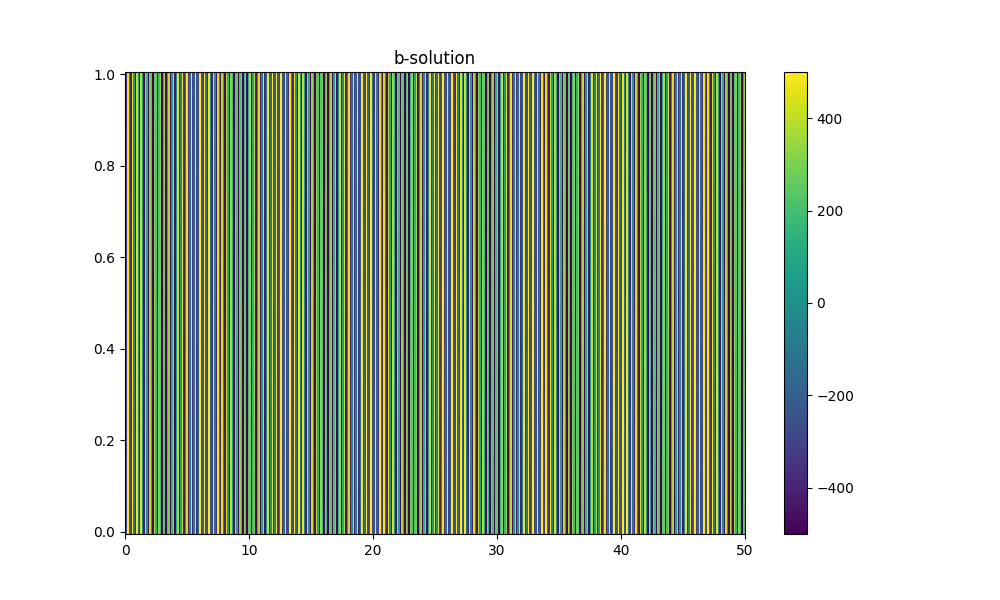

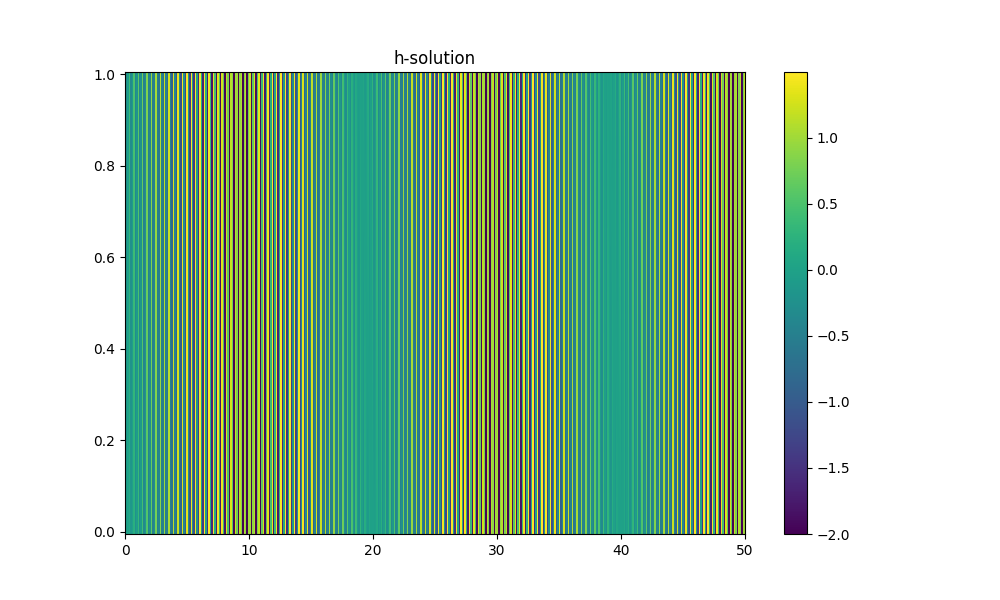

In [333]:
#colorplot of solution with really high rapid frequency
import numpy as np
import sympy as sp #can change setup to keep symbolic as long as possible
import matplotlib.pyplot as plt

#setting up our grid
z_range = np.linspace(0, 50, 6001)
t_range = np.linspace(0, 1, 101) 
z, t = np.meshgrid(z_range, t_range)  # Create a grid of z and t values

#setting some constants
D = 100  #length of the area with the magnetic field. We set it to match our z-value for now. 
omega_r = 1000
omega_s = 0.05
A = 1


# We find the real part of the solution from the paper (in zone 2) (exact)
#b-field
b_term1 = A / 2 * omega_s / (2 * omega_r) * np.exp(1j * omega_r *2*np.pi * (z - t))
b_term2 = -A * omega_s / 4 * np.exp(1j * D * (2 * omega_r *2*np.pi - omega_s *2*np.pi)) * np.exp(-1j * omega_r *2*np.pi * (z + t))
b_term3 = A / 2 * omega_r * np.exp(-1j * omega_s *2*np.pi * (z + t)) * np.exp(1j * omega_r *2*np.pi * (z - t))
b = b_term1 + b_term2 + b_term3
b_real = np.real(b)  # Extract real part

#h-field
h_term1 = -A * (1 - omega_s / (2 * omega_r)) * np.exp(1j * omega_r *2*np.pi * (z - t))
h_term2 = -A * omega_s / (2 * omega_r) * np.exp(1j * D * (2 * omega_r *2*np.pi - omega_s *2*np.pi)) * np.exp(-1j * omega_r *2*np.pi * (z + t))
h_term3 = A * np.exp(-1j * omega_s *2*np.pi * (z + t)) * np.exp(1j * omega_r *2*np.pi * (z - t))
h = h_term1 + h_term2 + h_term3
h_real = np.real(h)  # Extract real part


import matplotlib.pyplot as plt
import numpy as np


# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(z, t, b_real, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)
ax.set_title("b-solution")
# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4) 
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(z, t, h_real, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)
ax.set_title("h-solution")
# Optionally adjust the color axis
#mesh.set_clim(-0.1, 0.4)
plt.show()



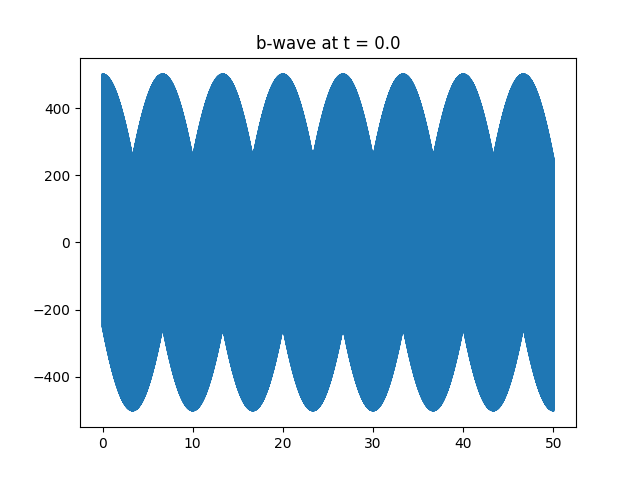

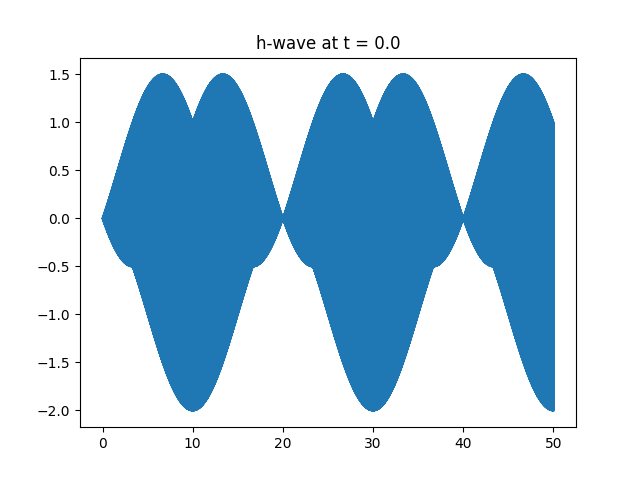

In [334]:
index = 0

plt.figure()
plt.plot(z_range, b_real[index])
plt.title(f"b-wave at t = {float(t_range[index])}")
plt.show()

plt.figure()
plt.plot(z_range, h_real[index])
plt.title(f"h-wave at t = {float(t_range[index])}")
plt.show()

In [335]:
#solving the equations using exact ICs from paper

import numpy as np
import sympy as sp
from pde import ScalarField, FieldCollection, PDE, MemoryStorage, CartesianGrid

# Define symbols
z, t = sp.symbols('z t')
D, omega_r, omega_s, A = sp.symbols('D omega_r omega_s A')

# b-field symbolic equation
b_term1 = A / 2 * omega_s / (2 * omega_r) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
b_term2 = -A * omega_s / 4 * sp.exp(sp.I * D * (2 * omega_r *2*sp.pi - omega_s *2*sp.pi)) * sp.exp(-sp.I * omega_r *2*sp.pi * (z + t))
b_term3 = A / 2 * omega_r *2*sp.pi * sp.exp(-sp.I * omega_s *2*sp.pi * (z + t)) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
b = b_term1 + b_term2 + b_term3
b_real = sp.re(b)  # Extract real part
b_dt = sp.diff(b, t)  # Time derivative
b_real_dt = sp.re(b_dt)

# h-field symbolic equation
h_term1 = -A * (1 - omega_s / (2 * omega_r)) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
h_term2 = -A * omega_s / (2 * omega_r) * sp.exp(sp.I * D * (2 * omega_r *2*sp.pi - omega_s *2*sp.pi)) * sp.exp(-sp.I * omega_r *2*sp.pi * (z + t))
h_term3 = A * sp.exp(-sp.I * omega_s *2*sp.pi * (z + t)) * sp.exp(sp.I * omega_r *2*sp.pi * (z - t))
h = h_term1 + h_term2 + h_term3
h_real = sp.re(h)  # Extract real part
h_dt = sp.diff(h, t)  # Time derivative
h_real_dt = sp.re(h_dt)

# Convert symbolic expressions to numerical functions
b_real_func = sp.lambdify((z, t, D, omega_r, omega_s, A), b_real, 'numpy')
b_real_dt_func = sp.lambdify((z, t, D, omega_r, omega_s, A), b_real_dt, 'numpy')
h_real_func = sp.lambdify((z, t, D, omega_r, omega_s, A), h_real, 'numpy')
h_real_dt_func = sp.lambdify((z, t, D, omega_r, omega_s, A), h_real_dt, 'numpy')

# Setup for numerical evaluation
grid = CartesianGrid([[0, 50]], [6001])  # 1D grid for the z-axis
z_vals = grid.axes_coords[0]
t_val = 0  # Time for initial condition
D_val = 10
omega_r_val = 1000
omega_s_val = 0.05
Bx = 2*omega_s_val
A_val = 1

# Evaluate the symbolic functions numerically
b_init_data = b_real_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)
b_init_dt_data = b_real_dt_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)
h_init_data = h_real_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)
h_init_dt_data = h_real_dt_func(z_vals, t_val, D_val, omega_r_val, omega_s_val, A_val)

# Create ScalarField objects
b_init = ScalarField(grid, data=b_init_data, label="b(t, z)")
h_init = ScalarField(grid, data=h_init_data, label="h(t, z)")
bt_init = ScalarField(grid, data=b_init_dt_data, label="bt(t, z)")
ht_init = ScalarField(grid, data=h_init_dt_data, label="ht(t, z)")

initial_conditions = FieldCollection([b_init, h_init, bt_init, ht_init])

#our equations
pde = PDE({
    "b": "bt",  # b_t = bt
    "h": "ht",  # h_t = ht
    "bt": f"laplace(b) + laplace(h) * {Bx}",  # bt_t = function of second derivative of b
    "ht": f"laplace(h) - 4 * {Bx} * b"       # ht_t = function of second derivative of h
})

#solve and store time slices
storage.clear()
storage = MemoryStorage()
#this dt needs to be really small
pde.solve(initial_conditions, t_range=1, dt=0.00001, tracker=storage.tracker(interval=0.01)) 


FieldCollection(ScalarField(..., label="b(t, z)"), ScalarField(..., label="h(t, z)"), ScalarField(..., label="bt(t, z)"), ScalarField(..., label="ht(t, z)"))

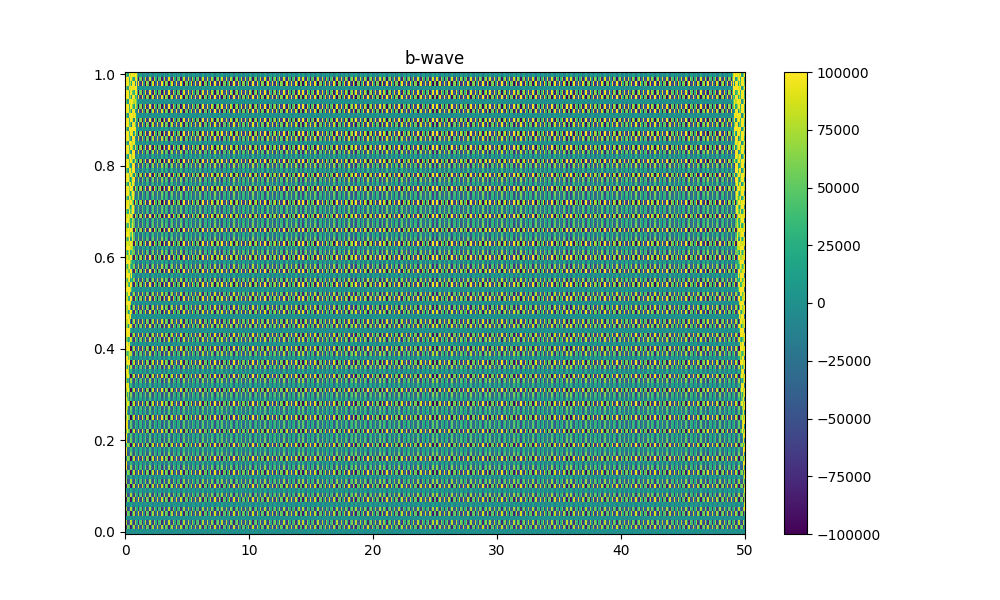

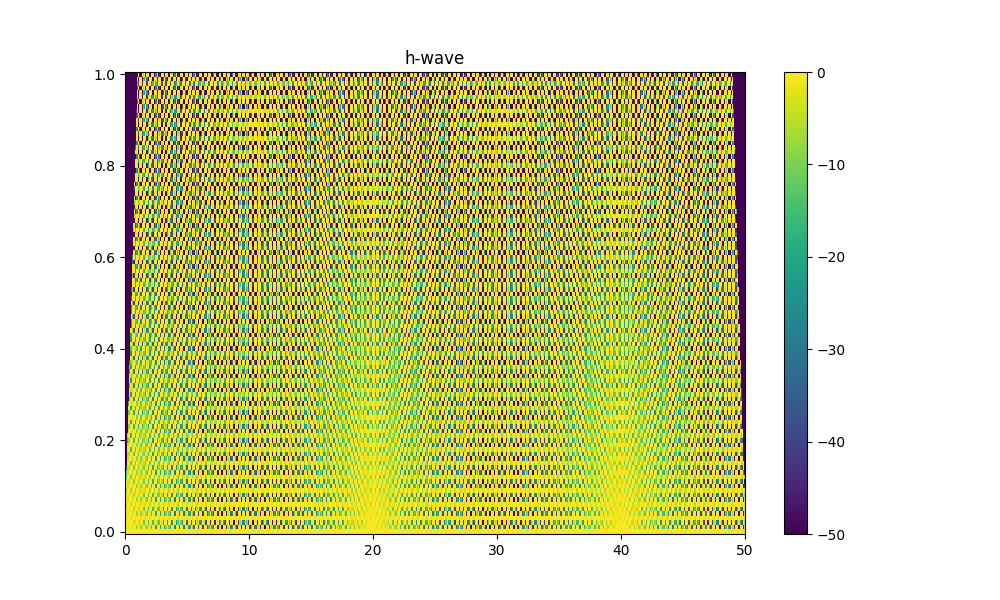

In [343]:
import matplotlib.pyplot as plt
import numpy as np

z = grid.axes_coords[0] 
time_points = storage.times
b_data = np.array([state.data[0] for state in storage])
h_data = np.array([state.data[1] for state in storage])

# Create a meshgrid for time and space
T, Z = np.meshgrid(time_points, z, indexing="ij")

# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, b_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("b-wave")

# Optionally adjust the color axis
mesh.set_clim(-100000, 100000)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, h_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("h-wave")

# Optionally adjust the color axis
mesh.set_clim(-50,0)
plt.show()

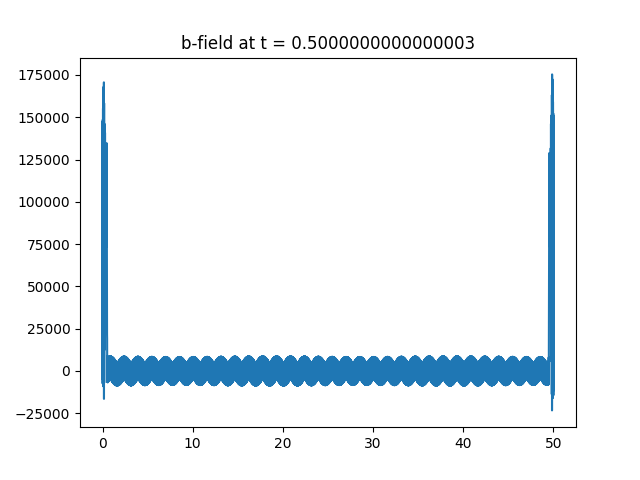

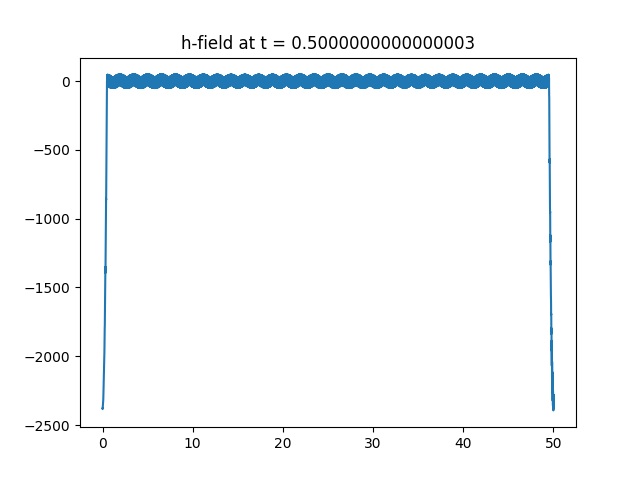

: 

In [ ]:
plt.figure()
index = 50
plt.plot(z, b_data[index])
plt.title(f"b-field at t = {time_points[index]}")
#plt.ylim([-100000000,100000000])
plt.show()
plt.figure()
plt.plot(z, h_data[index])
plt.title(f"h-field at t = {time_points[index]}")
#plt.ylim([-50000,50000])
plt.show()

Try with some other initial conditions

In [282]:
grid = CartesianGrid([[-10, 10]], [2001])  # 1D grid for the z-axis
z_vals = grid.axes_coords[0]

In [286]:
omega_r_val=1
b_init = A_val/2*omega_r_val*np.sin(z_vals*omega_r_val*2*np.pi)*np.sin(z_vals*0.05*2*np.pi) #adjust to be right before z=0 #add np.pi to all sins

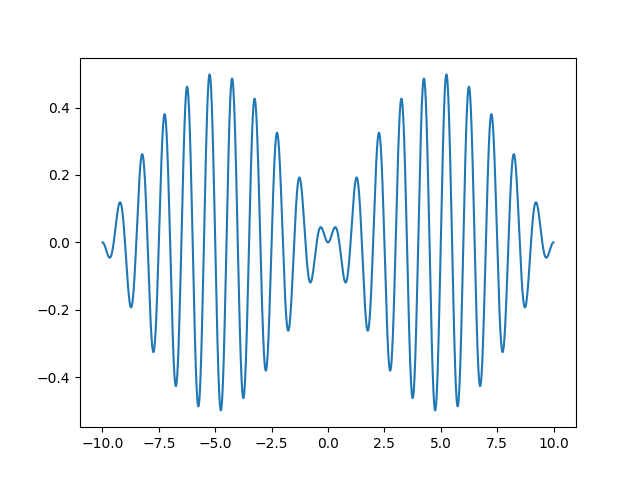

In [287]:
plt.figure()
plt.plot(z_vals, b_init, '-')
plt.show()

In [328]:
#define a wave packet right around t=0
#define a big-ish area around with 0-s
#still only plot the relevant parts

# Setup for numerical evaluation
grid = CartesianGrid([[-10, 50]], [7001])  # 1D grid for the z-axis
z_vals = grid.axes_coords[0]
t_val = 0  # Time for initial condition
D_val = 100
omega_r_val = 10000
omega_s_val = 0.1
Bx = 2*omega_s_val
A_val = 1

#initial wave packet
b_init_data = A_val/2*omega_r_val*np.sin(z_vals*omega_r_val)*np.sin(z_vals*0.05) #adjust to be right before z=0
h_init_data = 0
bt_init_data = np.diff(b_init_data)
bt_init_data = np.append(bt_init_data, 0)
ht_init_data = np.cos(z_vals)

# Create ScalarField objects

b_init = ScalarField(grid, data=np.where((-10 < z) & (z < 0), b_init_data, 0), label="b(t, z)")
h_init = ScalarField(grid, data=np.where((-10 < z) & (z < 0), h_init_data, 0), label="h(t, z)")
bt_init = ScalarField(grid, data=np.where((-10 < z) & (z < 0), bt_init_data, 0), label="bt(t, z)")
ht_init = ScalarField(grid, data=np.where((-10 < z) & (z < 0), ht_init_data, 0), label="ht(t, z)")

initial_conditions = FieldCollection([b_init, h_init, bt_init, ht_init])

#our equations
pde = PDE({
    "b": "bt",  # b_t = bt
    "h": "ht",  # h_t = ht
    "bt": f"laplace(b) + laplace(h) * {Bx}",  # bt_t = function of second derivative of b
    "ht": f"laplace(h) - 4 * {Bx} * b"       # ht_t = function of second derivative of h
})

#solve and store time slices
storage.clear()
storage = MemoryStorage()
#this dt needs to be really small
pde.solve(initial_conditions, t_range=1, dt=0.00001, tracker=storage.tracker(interval=0.01)) 


FieldCollection(ScalarField(..., label="b(t, z)"), ScalarField(..., label="h(t, z)"), ScalarField(..., label="bt(t, z)"), ScalarField(..., label="ht(t, z)"))

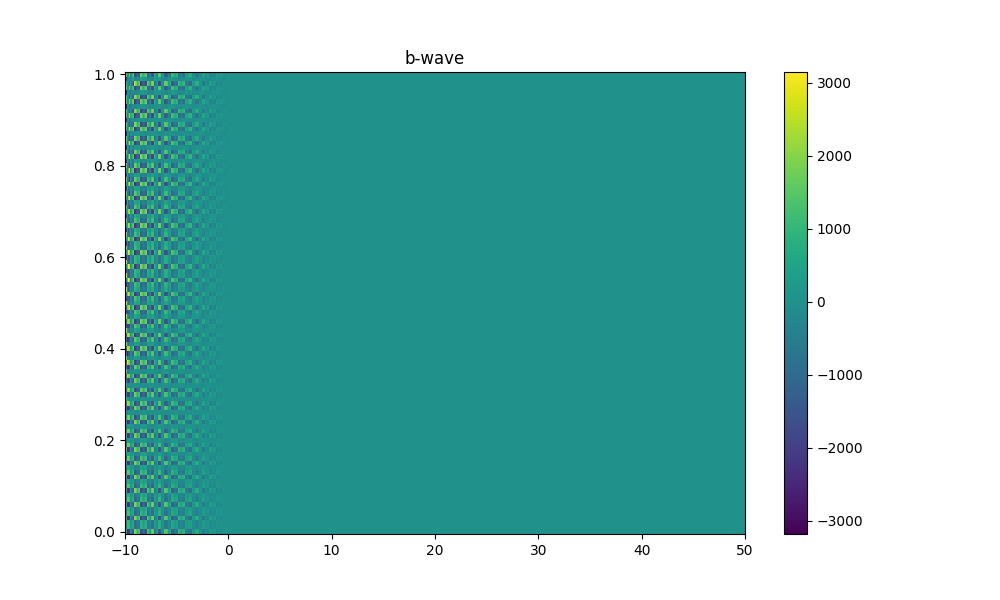

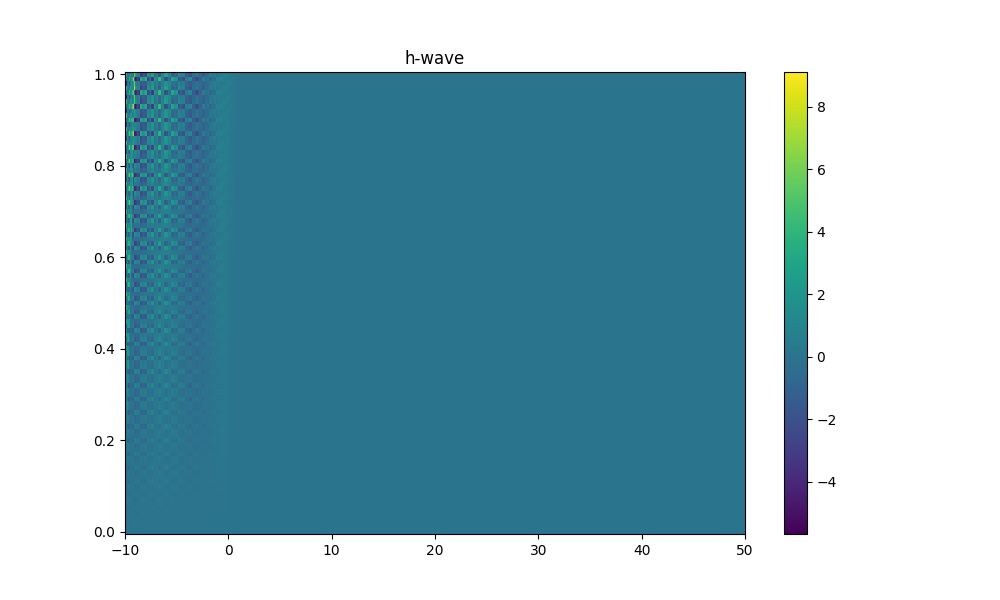

In [329]:
import matplotlib.pyplot as plt
import numpy as np

z = grid.axes_coords[0] 
time_points = storage.times
b_data = np.array([state.data[0] for state in storage])
h_data = np.array([state.data[1] for state in storage])

# Create a meshgrid for time and space
T, Z = np.meshgrid(time_points, z, indexing="ij")

# Plot using pcolormesh
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, b_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("b-wave")

# Could adjust the color axis
#mesh.set_clim(-100000000, 100000000)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(Z, T, h_data, shading="auto")  # Use shading='auto' for smooth rendering
cbar = plt.colorbar(mesh, ax=ax)

ax.set_title("h-wave")

# Could adjust the color axis
#mesh.set_clim(-500000,500000)
plt.show()

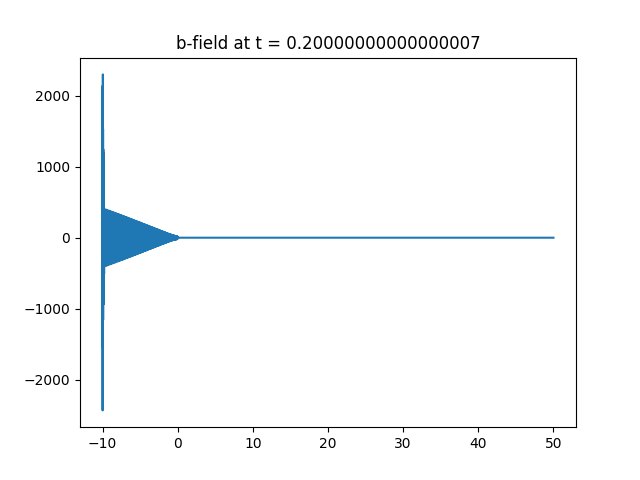

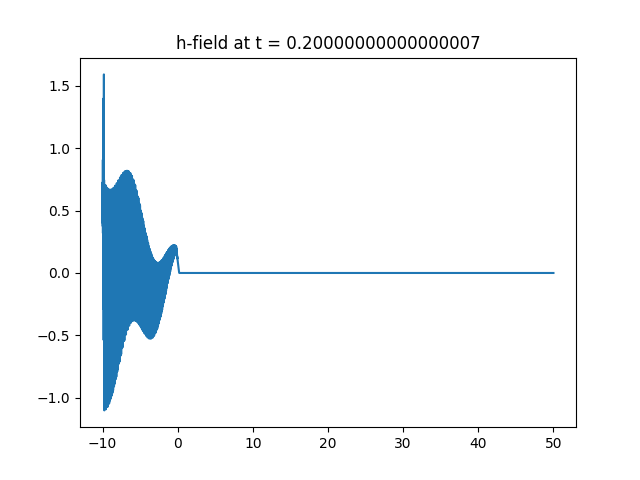

In [331]:
plt.figure()
index = 20
plt.plot(z, b_data[index])
plt.title(f"b-field at t = {time_points[index]}")
#plt.ylim([-100000000,100000000])
plt.show()
plt.figure()
plt.plot(z, h_data[index])
plt.title(f"h-field at t = {time_points[index]}")
#plt.ylim([-5000000,5000000])
plt.show()